# Tarea 9 

## Diferencias Finitas

# Parte 2

Ejercicio 2. Utiliza tu función derivadaNumerica para calcular la derivada de la función $\cos$ en un punto $x_0\in[0,1)$. Compara tu resultado con el que indica el cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$. Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:

In [5]:
function derivada_numerica(f,x,h) #definamos la funcion de la derivada sin limite
    df=(f(x+h)-f(x))/h
end

derivada_numerica (generic function with 1 method)

In [12]:
f(x)=cos(x)
derivada_numerica(f,0,0.1)

-0.049958347219741794

In [7]:
-1*sin(0) #Εsta es la derivada de la funcion original envaluada en 0

-0.0

In [8]:
Pkg.add("PyPlot") #Instalamos para graficar la convergencia

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [9]:
using PyPlot

In [10]:
function derivada_numerica2(f,x)
list=zeros(100) #crear una lista que guarde el valor de la funcion derivada
    n=1
    for i in 1:100
        df=(f(x+(1/n))-f(x))*n #para f'
              list[i]=df; 
              n+=1 #aumentando el valor de n en cada iteración,aqui h=1/n
           end
return list 
end

derivada_numerica2 (generic function with 1 method)

In [11]:
list1=derivada_numerica2(f,0)

100-element Array{Float64,1}:
 -0.459698  
 -0.244835  
 -0.165129  
 -0.12435   
 -0.0996671 
 -0.0831406 
 -0.0713072 
 -0.0624187 
 -0.0554984 
 -0.0499583 
 -0.0454232 
 -0.0416426 
 -0.0384426 
  ⋮         
 -0.00561792
 -0.0055555 
 -0.00549445
 -0.00543473
 -0.00537629
 -0.0053191 
 -0.00526311
 -0.00520829
 -0.00515459
 -0.005102  
 -0.00505046
 -0.00499996

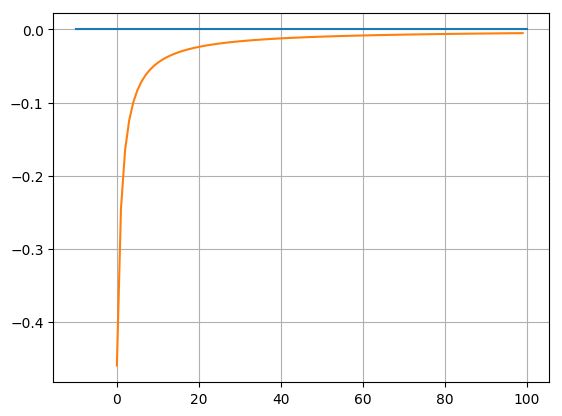

In [13]:
a=linspace(-10,100)
y=a*0
plot(a,y); #El valor de le derivada exacta
plot(real(list1)); #las derivadas
grid("on");

Para determinar el error con $\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$ en la list:

In [20]:
using SymPy

In [21]:
function error(f,x0,h0)
    longitud=length(h0)#Numero de elementos del arreglo h0
    d(h)=(g(x0+h)-g(x0))/h #f´
    x = Sym("x")
    g = f(x) #funcion para calcular su error
    dg = diff(g(x)) #Y su derivada
    df = lambdify(dg,[x]) 
    listaerror=[]
    for i in 1:longitud # aplicando para cada valor de la list1
        epsilon=(d(h0[i])-df(x0))/df(x0) #usando formula del error
        push!(listaerror,epsilon) #Guardo el valor de dicha epsilon en mi arreglo
    end
    return listaerror
end

error (generic function with 1 method)

In [22]:
f(x)=cos(x)
error(f,0.1,list1)

  likely near In[22]:2
  likely near In[22]:2
  likely near In[22]:2
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


100-element Array{Any,1}:
   -2.28561313695614
   -1.22396925319059
  -0.825562069624939
  -0.621454757623840
  -0.497917086425617
  -0.415229509923399
  -0.356043331046853
  -0.311600549818252
  -0.277008811722825
  -0.249322686516313
  -0.226663612975161
  -0.207777297803261
  -0.191794443250958
                   ⋮
 -0.0280010841937714
 -0.0276899112874260
 -0.0273855783412301
 -0.0270878622838744
 -0.0267965496391554
 -0.0265114360165995
 -0.0262323256321040
 -0.0259590308606741
 -0.0256913718148650
 -0.0254291759506126
 -0.0251722776964723
 -0.0249205181041240

In [23]:
using PyPlot #Grafiquemos los errores obtenidos

In [26]:
C(x)=x*0 #definamos una funcion C coo cero


C (generic function with 1 method)

In [27]:
zero=[] #Arreglo que guardará tantos ceros 


0-element Array{Any,1}

In [29]:
zero=C(list1)

100-element Array{Float64,1}:
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
  ⋮  
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0

Ejercicio 3. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe alguna forma de mejorar el cálculo de la derivada numérica? Comenta.
Tip: ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series?
Nota: Entregar en $\LaTeX$ en el notebook de la tarea.

Veamos las dos series de taylor para la  $f$ en $h$ y $-h$:
$$f(x+h)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)\cdot (h)^k}{k!}$$ y $$f(x-h)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)\cdot (-h)^k}{k!}$$
Obteniendo la diferencia de ambas, 
$$f(x+h)-f(x-h)=\sum_{k=0}^{\infty} \frac{f^{(k)(x)}}{k!}\cdot (h^k-(-h)^k)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)}{k!}\cdot (h^k+(-1)^{k+1}\cdot h^k)=\sum_{k=0}^{\infty} \frac{2f^{(2k+1)}(x)\cdot h^{2k+1}}{(2k+1)!}$$
Obtenienteniendo el primer termino de la serie, es decir,  $\sum_{k=0}^{\infty} \frac{2f^{(2k+1)}(x)\cdot h^{2k+1}}{(2k+1)!} \approx 2f'(x)h$

Por lo que tenemos: $$\Rightarrow\ f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}$$

Pregunta:¿Hay una forma de construir una derivada numérica aún mas exacta sin tener que hacer $h$ arbitrariamente pequeño?, ¿que opinas?

Si definimos la derivada numérica simétrica ($f(x+h)-f(x-h)$), esta tendra que aproximarse en dos direcciones y no solo en uno. 

Ejercicio 4. Implementa la derivada simétrica en Julia como derivada_Simetrica y repite la comparativa que realizaste en el ejercicio 2.

In [32]:
function derivada_simetrica(f,x,h) #tomando una funcion f como lo anterior
              df=(f(x+h)-f(x-h))/2h #Aplicamos la derivada numerica simetrica
        
return df
end

derivada_simetrica (generic function with 1 method)

In [34]:
derivada_simetrica(f,0,0.001) 

0.0

In [35]:
#Ahora, como en el ejercicio 2
function derivada_simetrica2(f,x) 
list=zeros(100)
n=1
           for i in 1:100
              df=(f(x+(1/n))-f(x-(1/n)))*n/2 
              list[i]=df; #Asignamos el valor de la derivada a un valor de la list1
              n+=1 #Se aumenta el valor de n en cada iteración,aqui h=1/n
           end
return list
end

derivada_simetrica2 (generic function with 1 method)

In [36]:
list2=derivada_simetrica2(f,pi/4) #Evaluamos las dos funciones en el mismo punto (tomando el punto pi/4)

100-element Array{Float64,1}:
 -0.59501 
 -0.67801 
 -0.694085
 -0.699764
 -0.702402
 -0.703838
 -0.704704
 -0.705267
 -0.705653
 -0.705929
 -0.706133
 -0.706289
 -0.70641 
  ⋮       
 -0.707092
 -0.707092
 -0.707093
 -0.707093
 -0.707093
 -0.707093
 -0.707094
 -0.707094
 -0.707094
 -0.707095
 -0.707095
 -0.707095

In [39]:
#Y otra que hemos hecho anteriormente
list3=derivada_numerica2(f,pi/4)

100-element Array{Float64,1}:
 -0.920065
 -0.851135
 -0.810849
 -0.787693
 -0.772877
 -0.762627
 -0.755126
 -0.749403
 -0.744896
 -0.741255
 -0.738252
 -0.735734
 -0.733593
  ⋮       
 -0.711064
 -0.711021
 -0.710978
 -0.710936
 -0.710895
 -0.710855
 -0.710815
 -0.710777
 -0.710739
 -0.710702
 -0.710666
 -0.710631

In [40]:
#Tomando el valor exacto 
sin(pi/4)

0.7071067811865475

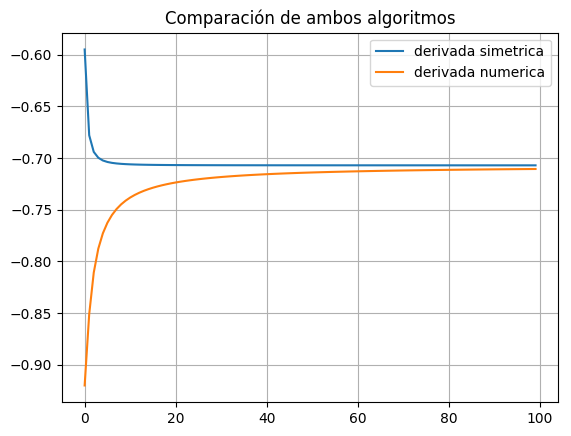

In [42]:
#Comparando en una grafica, 
title("Comparación de ambos algoritmos")
plot(list2,label="derivada simetrica"); #Graficamos ambas funciones evaluadas en el mismo punto
plot(list3, label="derivada numerica");x=range(-10,100)
grid("on");
legend()
show();


Ejercicio 5: Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente: $$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Demostración. Sea el operador $\Delta_h:\:f(x)\mapsto\:f(x+h)-f(x)$. Sean $\:f,g :\mathbb{R} \rightarrow \mathbb{R},\ $ funciones, y sean $\alpha,\beta $ reales del campo, es decir $\mathbb{R}$

Con el $\Delta_h$ a $(\alpha\:f+\beta\:g)(x)$:
$$\Delta_{h}\left[(\alpha\:f+\beta\:g)(x)\right]=(\alpha\:f+\beta\:g)(x+h)-(\alpha\:f+\beta\:g)(x)=\alpha\:f(x+h)+\beta\:g(x+h)-\alpha\:f(x)-\beta\:g(x)$$
$\Rightarrow$
$$\Delta_{h}\left[(\alpha\:f+\beta\:g)(x)\right]=\alpha\left[\:f(x+h)-f(x)\right]+\beta\left[g(x+h)-g(x)\right]=\alpha\Delta_{h}\:f(x)+\beta\Delta_{h}\:g(x)$$ Por lo tanto $$\:\:\Delta_{h}\left[(\alpha\:f+\beta\:g)(x)\right]=\alpha\Delta_{h}\:f(x)+\beta\Delta_{h}\:g(x)$$

Ahora retomando lo visto en clase:
$$\begin{eqnarray} \Delta_{h}\left[f(x)\right]=f(x+h)-f(x)&=& \left[h \left. \frac{d}{d \xi} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}} \right|_{\substack{ \xi_{1}=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)\right]f{\left (x \right )}\\ &=&\left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]f(x) \end{eqnarray}$$
Y por lo tanto $$\:\:\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{\xi=x}}$$


Ejercicio 6: Para saber como se relaciona el operador derivada exacta con el operador diferencia finita hacia adelante es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma: $$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
Nota: En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

Demostración.
Para relacionar el operador derivada exacta con el operador diferencia finita hacia adelante primero identifiquemos a este último como una función $\phi$
$$\Delta_{h}=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{\xi=x}}.$$
Si $\Theta$ es un operador $\Rightarrow$ $\Theta^{2}=\Theta \circ \Theta$, entonces:
$$\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)=\sum_{n=1}^{\infty} \frac{1}{n!}\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)^{n}.$$
Dado que la serie de la exponencial es:
$$\displaystyle e^{x}-1=\sum_{n=1}^{\infty}\frac{x^{n}}{n!}$$
$\Rightarrow$
$$\Delta_{h}=\exp\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)-1,$$
En términos del operador diferencia finita :
$$\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{h}\log\left(1+\Delta_{h}\right)$$
Por lo que $$\:\:\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{h}\sum_{n=1}^{\infty}\frac{(-1)^{n+1}}{n}\Delta_{h}^{\:n}=\frac{1}{h}\left(\Delta_{h}-\frac{1}{2}\Delta_{h}^{\:2}+\cdots\right).$$